#Challenge TelecomX

##Extracción(E - Extract)

###Conoce el conjunto de datos

In [1]:
import pandas as pd

In [2]:
datos = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

In [3]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
datos['customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7267 entries, 0 to 7266
Series name: customer
Non-Null Count  Dtype 
--------------  ----- 
7267 non-null   object
dtypes: object(1)
memory usage: 56.9+ KB


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [7]:
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [8]:
columnas_problema =['customer', 'phone', 'internet', 'account']

In [9]:
columnas_normalizadas = []
for i in columnas_problema:
    df_norm = pd.json_normalize(datos[i])
    df_norm_colum = [f"{i}.{subcol}" for subcol in df_norm.columns]
    columnas_normalizadas.append(df_norm)

In [10]:
datos_normalizados = datos.drop(columns=columnas_problema)
datos_normalizados = pd.concat([datos_normalizados] + columnas_normalizadas, axis=1)
datos_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [11]:
columnas_completas = list(datos_normalizados.columns)
columnas_completas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

##Transformación (T - Transform)

###Comprobación de incoherencias en los datos

In [12]:
# Validar valores unicos en cada columna
for col in datos_normalizados.columns:
    print(col)
    print(pd.unique(datos_normalizados[col]))

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' '']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['Yes' 'No']
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService
['Yes' 'No']
MultipleLines
['No' 'Yes' 'No phone service']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['Yes' 'No' 'No internet service']
StreamingTV
['Yes' 'No' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['One year' 'Month-to-month' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automati

###Manejo de inconsistencias

In [13]:
# Validar cuantos clientes tienen Churn = ''
print(datos_normalizados[datos_normalizados['Churn'] == ''].shape[0])

224


In [14]:
# Elegí reemplazar por Unknown porque representan el 3% de la información, no me parece un valor tan pequeño como para eliminar
datos_normalizados['Churn'] = datos_normalizados['Churn'].replace('', 'Unknown')

In [15]:
print(datos_normalizados[datos_normalizados['Churn'] == ''].shape[0])

0


In [16]:
# Charges.Total tenia valores tipo cadena, aquí los cambio a numéricos
datos_normalizados['Charges.Total'] = pd.to_numeric(datos_normalizados['Charges.Total'], errors='coerce')

In [17]:
# Validar cuantos valores NaN hay
print(datos_normalizados['Charges.Total'].isnull().sum())

11


In [18]:
pd.set_option('display.max_columns', None)
datos_normalizados[datos_normalizados['Charges.Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [19]:
# Cambié los valores a 0 porque todos tienen el valor Tenure = 0, quiere decir que son nuevos clientes y por eso no hay nada en Charges.Total
datos_normalizados.loc[(datos_normalizados['Charges.Total'].isna()) & (datos_normalizados['tenure'] == 0), 'Charges.Total'] = 0

In [20]:
datos_normalizados[datos_normalizados['Charges.Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


###Columna de cuentas diarias

In [21]:
datos_normalizados['Cuentas_Diarias'] = datos_normalizados['Charges.Monthly'] / 30

In [22]:
datos_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


###Estandarización y transformación de datos

In [23]:
for col in datos_normalizados.columns:
  print(col)
  print(pd.unique(datos_normalizados[col]))

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' 'Unknown']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['Yes' 'No']
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService
['Yes' 'No']
MultipleLines
['No' 'Yes' 'No phone service']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['Yes' 'No' 'No internet service']
StreamingTV
['Yes' 'No' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['One year' 'Month-to-month' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (a

In [24]:
columnas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in columnas_binarias:
  datos_normalizados[col] = datos_normalizados[col].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-24-3649130795.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_normalizados[col] = datos_normalizados[col].replace({'Yes': 1, 'No': 0})


In [25]:
datos_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


In [26]:
datos_normalizados.rename(columns={'customerID': 'ID cliente', 'Churn': 'Cliente canceló',
                                  'gender': 'Género', 'SeniorCitizen': 'Cliente es adulto mayor',
                                  'Partner': 'Cliente tiene pareja', 'Dependents': 'Cliente tiene dependientes',
                                  'tenure': 'Meses de contrato', 'PhoneService': 'Servicio telefónico',
                                  'MultipleLines': 'Múltiples líneas', 'InternetService': 'Servicio de internet',
                                  'OnlineSecurity': 'Seguridad en línea', 'OnlineBackup': 'Respaldo en línea',
                                  'DeviceProtection': 'Protección del dispositivo', 'TechSupport': 'Soporte técnico',
                                  'StreamingTV': 'Televisión por cable', 'StreamingMovies': 'Streaming de películas',
                                  'Contract': 'Tipo de contrato', 'PaperlessBilling': 'Factura en línea',
                                  'PaymentMethod': 'Forma de pago', 'Charges.Monthly': 'Facturación mensual',
                                  'Charges.Total': 'Facturación anual', 'Cuentas_Diarias': 'Facturación diaria'}, inplace=True)

In [27]:
datos_normalizados.replace({'Unknown': 'Desconocido', 'Female': 'Femenino', 'Male': 'Masculino', 'Yes': 'Sí',
                            'No phone service': 'Sin servicio telefónico', 'Fiber optic': 'Fibra óptica',
                            'No internet service': 'Sin servicio de internet', 'One year': 'Un año',
                            'Month-to-month': 'Mensual', 'Two year': 'Dos años', 'Mailed check': 'Cheque por correo',
                            'Electronic check': 'Cheque electrónico', 'Credit card (automatic)': 'Tarjeta de crédito (automática)',
                            'Bank transfer (automatic)': 'Transferencia bancaria (automática)'}, inplace=True)

In [28]:
datos_normalizados

,ID cliente,Cliente canceló,Género,Cliente es adulto mayor,Cliente tiene pareja,Cliente tiene dependientes,Meses de contrato,Servicio telefónico,Múltiples líneas,Servicio de internet,Seguridad en línea,Respaldo en línea,Protección del dispositivo,Soporte técnico,Televisión por cable,Streaming de películas,Tipo de contrato,Factura en línea,Forma de pago,Facturación mensual,Facturación anual,Facturación diaria
0,0002-ORFBO,0,Femenino,0,1,1,9,1,No,DSL,No,Sí,No,Sí,Sí,No,Un año,1,Cheque por correo,65.60,593.30,2.186667
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Sí,DSL,No,No,No,No,No,Sí,Mensual,0,Cheque por correo,59.90,542.40,1.996667
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,No,Fibra óptica,No,No,Sí,No,No,No,Mensual,1,Cheque electrónico,73.90,280.85,2.463333
3,0011-IGKFF,1,Masculino,1,1,0,13,1,No,Fibra óptica,No,Sí,Sí,No,Sí,Sí,Mensual,1,Cheque electrónico,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,No,Fibra óptica,No,No,No,Sí,Sí,No,Mensual,1,Cheque por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Femenino,0,0,0,13,1,No,DSL,Sí,No,No,Sí,No,No,Un año,0,Cheque por correo,55.15,742.90,1.838333
7263,9992-RRAMN,1,Masculino,0,1,0,22,1,Sí,Fibra óptica,No,No,No,No,No,Sí,Mensual,1,Cheque electrónico,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Masculino,0,0,0,2,1,No,DSL,No,Sí,No,No,No,No,Mensual,1,Cheque por correo,50.30,92.75,1.676667
7265,9993-LHIEB,0,Masculino,0,1,1,67,1,No,DSL,Sí,No,Sí,Sí,No,Sí,Dos años,0,Cheque por correo,67.85,4627.65,2.261667


In [29]:
for col in datos_normalizados.columns:
  print(col)
  print(pd.unique(datos_normalizados[col]))

ID cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Cliente canceló
[0 1 'Desconocido']
Género
['Femenino' 'Masculino']
Cliente es adulto mayor
[0 1]
Cliente tiene pareja
[1 0]
Cliente tiene dependientes
[1 0]
Meses de contrato
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
Servicio telefónico
[1 0]
Múltiples líneas
['No' 'Sí' 'Sin servicio telefónico']
Servicio de internet
['DSL' 'Fibra óptica' 'No']
Seguridad en línea
['No' 'Sí' 'Sin servicio de internet']
Respaldo en línea
['Sí' 'No' 'Sin servicio de internet']
Protección del dispositivo
['No' 'Sí' 'Sin servicio de internet']
Soporte técnico
['Sí' 'No' 'Sin servicio de internet']
Televisión por cable
['Sí' 'No' 'Sin servicio de internet']
Streaming de películas
['No' 'Sí' 'Sin servicio de internet']
Tipo de contrato

##Carga y análisis(L - Load & Analysis)

###Análisis Descriptivo

In [30]:
datos_normalizados.describe()

,Cliente es adulto mayor,Cliente tiene pareja,Cliente tiene dependientes,Meses de contrato,Servicio telefónico,Factura en línea,Facturación mensual,Facturación anual,Facturación diaria
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [31]:
datos_normalizados.groupby('Cliente canceló').describe()

Cliente es adulto mayor                                     \
                                  count      mean       std  min  25%  50%   
Cliente canceló                                                              
0                                5174.0  0.128721  0.334923  0.0  0.0  0.0   
1                                1869.0  0.254682  0.435799  0.0  0.0  0.0   
Desconocido                       224.0  0.178571  0.383851  0.0  0.0  0.0   

                          Cliente tiene pareja                                \
                 75%  max                count      mean       std  min  25%   
Cliente canceló                                                                
0                0.0  1.0               5174.0  0.528218  0.499251  0.0  0.0   
1                1.0  1.0               1869.0  0.357945  0.479524  0.0  0.0   
Desconocido      0.0  1.0                224.0  0.517857  0.500800  0.0  0.0   

                               Cliente tiene dependientes                      \
                 50%  75%  max                      count      mean       std   
Cliente canceló                                                                 
0                1.0  1.0  1.0                     5174.0  0.344801  0.475349   
1                0.0  1.0  1.0                     1869.0  0.174425  0.379576   
Desconocido      1.0  1.0  1.0                      224.0  0.316964  0.466335   

                                         Meses de contrato             \
                 min  25%  50%  75%  max             count       mean   
Cliente canceló                                                         
0                0.0  0.0  0.0  1.0  1.0            5174.0  37.569965   
1                0.0  0.0  0.0  0.0  1.0            1869.0  17.979133   
Desconocido      0.0  0.0  0.0  1.0  1.0             224.0  31.571429   

                                                        Servicio telefónico  \
                       std  min   25%   50%   75%   max               count   
Cliente canceló                                                               
0                24.113777  0.0  15.0  38.0  61.0  72.0              5174.0   
1                19.531123  1.0   2.0  10.0  29.0  72.0              1869.0   
Desconocido      24.998552  1.0   7.0  29.0  56.0  72.0               224.0   

                                                             Factura en línea  \
                     mean       std  min  25%  50%  75%  max            count   
Cliente canceló                                                                 
0                0.901044  0.298632  0.0  1.0  1.0  1.0  1.0           5174.0   
1                0.909042  0.287626  0.0  1.0  1.0  1.0  1.0           1869.0   
Desconocido      0.888393  0.315588  0.0  1.0  1.0  1.0  1.0            224.0   

                                                              \
                     mean       std  min  25%  50%  75%  max   
Cliente canceló                                                
0                0.535562  0.498782  0.0  0.0  1.0  1.0  1.0   
1                0.749064  0.433668  0.0  0.0  1.0  1.0  1.0   
Desconocido      0.625000  0.485207  0.0  0.0  1.0  1.0  1.0   

                Facturación mensual                                       \
                              count       mean        std    min     25%   
Cliente canceló                                                            
0                            5174.0  61.265124  31.092648  18.25  25.100   
1                            1869.0  74.441332  24.666053  18.85  56.150   
Desconocido                   224.0  63.412277  31.388712  18.75  28.425   

                                         Facturación anual               \
                    50%      75%     max             count         mean   
Cliente canceló                                                           
0                64.425  88.4000  118.75            5174.0  2549.911442   
1                79.650  94.2000  11

###Distribución de evasión

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [33]:
evasion = datos_normalizados['Cliente canceló'].astype(str).value_counts()
evasion

,count
Cliente canceló,
0,5174
1,1869
Desconocido,224


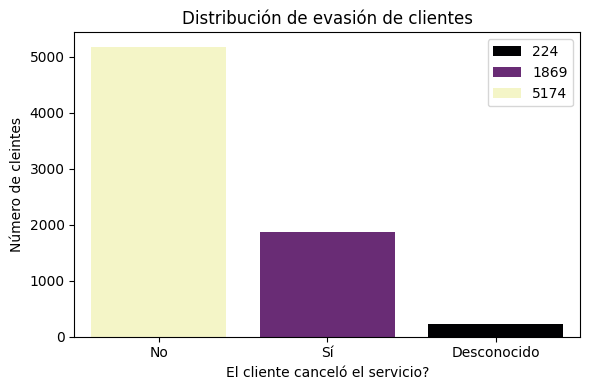

In [34]:
plt.figure(figsize=(6, 4))
sns.barplot(x=evasion.index, y=evasion.values, hue=evasion.values, palette='magma')

plt.title('Distribución de evasión de clientes')
plt.xlabel('El cliente canceló el servicio?')
plt.ylabel('Número de cleintes')
plt.xticks([0,1,2],['No', 'Sí', 'Desconocido'])
plt.tight_layout()
plt.show()

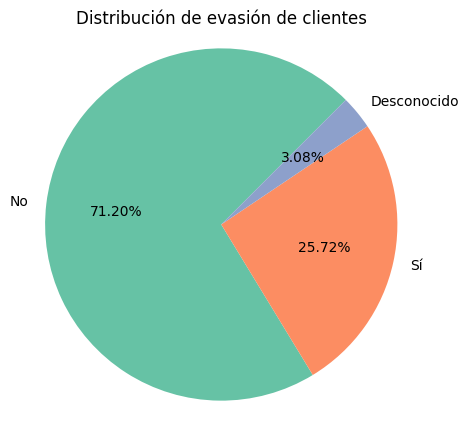

In [35]:
plt.figure(figsize=(5, 5))
plt.pie(evasion.values, labels=evasion.index.map({'0':'No', '1':'Sí', 'Desconocido':'Desconocido'}), autopct='%1.2f%%', startangle = 45, colors = sns.color_palette('Set2'))
plt.title('Distribución de evasión de clientes')
plt.axis('equal')
plt.show()

###Recuento de evasión por variables categóricas

####1. Evasión por género

In [36]:
fig = px.histogram(datos_normalizados, x='Género', color='Cliente canceló', barmode='group', title='Evasión por género', text_auto=True)
fig.update_layout(xaxis_title='Género', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####2. Evasión por adulto mayor

In [37]:
fig = px.histogram(datos_normalizados, x='Cliente es adulto mayor', color='Cliente canceló', barmode='group', title='Evasión por cliente es adulto mayor', text_auto=True)
fig.update_layout(xaxis_title='Cliente es adulto mayor', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####3. Evasión por pareja

In [38]:
fig = px.histogram(datos_normalizados, x='Cliente tiene pareja', color='Cliente canceló', barmode='group', title='Evasión por cliente tiene pareja', text_auto=True)
fig.update_layout(xaxis_title='Cliente tiene pareja', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####4. Evasión por dependientes

In [39]:
fig = px.histogram(datos_normalizados, x='Cliente tiene dependientes', color='Cliente canceló', barmode='group', title='Cliente tiene dependientes', text_auto=True)
fig.update_layout(xaxis_title='Cliente tiene dependientes', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####5. Evasión por servicio telefónico

In [40]:
fig = px.histogram(datos_normalizados, x='Servicio telefónico', color='Cliente canceló', barmode='group', title='Evasión por servicio telefónico', text_auto=True)
fig.update_layout(xaxis_title='Servicio telefónico', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####6. Evasión por múltiples líneas

In [41]:
fig = px.histogram(datos_normalizados, x='Múltiples líneas', color='Cliente canceló', barmode='group', title='Evasión por múltiples líneas', text_auto=True)
fig.update_layout(xaxis_title='Múltiples líneas', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####7. Evasión por servicio de internet

In [42]:
fig = px.histogram(datos_normalizados, x='Servicio de internet', color='Cliente canceló', barmode='group', title='Evasión por servicio de internet', text_auto=True)
fig.update_layout(xaxis_title='Servicio de internet', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####8. Evasión por seguridad en línea

In [43]:
fig = px.histogram(datos_normalizados, x='Seguridad en línea', color='Cliente canceló', barmode='group', title='Evasión por seguridad en línea', text_auto=True)
fig.update_layout(xaxis_title='Seguridad en línea', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####9. Evasión por respaldo en línea

In [44]:
fig = px.histogram(datos_normalizados, x='Respaldo en línea', color='Cliente canceló', barmode='group', title='Evasión por respaldo en línea', text_auto=True)
fig.update_layout(xaxis_title='Respaldo en línea', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####10. Evasión por protección del dispositivo

In [45]:
fig = px.histogram(datos_normalizados, x='Protección del dispositivo', color='Cliente canceló', barmode='group', title='Evasión por protección del dispositivo', text_auto=True)
fig.update_layout(xaxis_title='Protección del dispositivo', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####11. Evasión por soporte técnico

In [46]:
fig = px.histogram(datos_normalizados, x='Soporte técnico', color='Cliente canceló', barmode='group', title='Evasión por soporte técnico', text_auto=True)
fig.update_layout(xaxis_title='Soporte técnico', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####12. Evasión por televisión por cable

In [47]:
fig = px.histogram(datos_normalizados, x='Televisión por cable', color='Cliente canceló', barmode='group', title='Evasión por televisión por cable', text_auto=True)
fig.update_layout(xaxis_title='Televisión por cable', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####13. Evasión por streaming de películas

In [48]:
fig = px.histogram(datos_normalizados, x='Streaming de películas', color='Cliente canceló', barmode='group', title='Evasión por streaming de películas', text_auto=True)
fig.update_layout(xaxis_title='Streaming de películas', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####14. Evasión por tipo de contrato

In [49]:
fig = px.histogram(datos_normalizados, x='Tipo de contrato', color='Cliente canceló', barmode='group', title='Evasión por tipo de contrato', text_auto=True)
fig.update_layout(xaxis_title='Tipo de contrato', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####15. Evasión por factura en línea

In [50]:
fig = px.histogram(datos_normalizados, x='Factura en línea', color='Cliente canceló', barmode='group', title='Evasión por factura en línea', text_auto=True)
fig.update_layout(xaxis_title='Factura en línea', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

####16. Evasión por forma de pago

In [51]:
fig = px.histogram(datos_normalizados, x='Forma de pago', color='Cliente canceló', barmode='group', title='Evasión por forma de pago', text_auto=True)
fig.update_layout(xaxis_title='Forma de pago', yaxis_title='Número de clientes', width=700, height=500)
fig.show()

###Recuento de evasión por variables numéricas

####1. Evasión por meses de contrato

In [52]:
fig = px.histogram(datos_normalizados, x='Meses de contrato', color='Cliente canceló', barmode='overlay', nbins=30, title='Evasión por meses de contrato')
fig.update_layout(xaxis_title='Meses de contrato', yaxis_title='Número de clientes', width=900, height=700, bargap = 0.1)
fig.show()

In [53]:
fig = px.box(datos_normalizados, y='Meses de contrato', x='Cliente canceló', points='all', title='Evasión por meses de contrato')
fig.update_layout(xaxis_title='Canceló el servicio?', yaxis_title='Meses de contrato', width=700, height=500)
fig.show()

####2. Evasión por facturación mensual

In [57]:
fig = px.histogram(datos_normalizados, x='Facturación mensual', color='Cliente canceló', barmode='overlay', nbins=30, title='Evasión por facturación mensual')
fig.update_layout(xaxis_title='Facturación mensual', yaxis_title='Número de clientes', width=900, height=700, bargap = 0.1)
fig.show()

In [61]:
fig = px.box(datos_normalizados, y='Facturación mensual', x='Cliente canceló', points='all', title='Evasión por facturación mensual')
fig.update_layout(xaxis_title='Canceló el servicio?', yaxis_title='Facturación mensual', width=700, height=500)
fig.show()

####3. Evasión por facturación anual

In [58]:
fig = px.histogram(datos_normalizados, x='Facturación anual', color='Cliente canceló', barmode='overlay', nbins=30, title='Evasión por facturación anual')
fig.update_layout(xaxis_title='Facturación anual', yaxis_title='Número de clientes', width=900, height=700, bargap = 0.1)
fig.show()

In [62]:
fig = px.box(datos_normalizados, y='Facturación anual', x='Cliente canceló', points='all', title='Evasión por facturación anual')
fig.update_layout(xaxis_title='Canceló el servicio?', yaxis_title='Facturación anual', width=700, height=500)
fig.show()

####4. Evasión por facturación diaria

In [60]:
fig = px.histogram(datos_normalizados, x='Facturación diaria', color='Cliente canceló', barmode='overlay', nbins=30, title='Evasión por facturación diaria')
fig.update_layout(xaxis_title='Facturación diaria', yaxis_title='Número de clientes', width=900, height=700, bargap = 0.1)
fig.show()

In [63]:
fig = px.box(datos_normalizados, y='Facturación diaria', x='Cliente canceló', points='all', title='Evasión por facturación diaria')
fig.update_layout(xaxis_title='Canceló el servicio?', yaxis_title='Facturación diaria', width=700, height=500)
fig.show()

# Informe Final – Análisis de Evasión de Clientes (Churn) – Telecom X

## 🔹 Introducción

El presente informe tiene como objetivo la **evasión de clientes (churn)** en la empresa **Telecom X**, que enfrenta una tasa de cancelación considerable. Este análisis forma parte de un proyecto para identificar patrones de comportamiento en los clientes y apoyar el desarrollo de modelos predictivos y estrategias de retención.

A través de técnicas de análisis de datos, exploraremos las características que distinguen a los clientes que permanecen activos de aquellos que abandonan el servicio.

---

## 🔹 Limpieza y Tratamiento de Datos

Se llevó a cabo un proceso de **ETL (Extracción, Transformación y Carga)** que incluyó:

- **Importación de datos** desde una fuente JSON externa.
- **Normalización** de columnas que contenían diccionarios anidados.
- **Identificación y tratamiento de valores ausentes**, especialmente en la variable `Facturación anual` y `Cliente canceló`.
- Conversión de respuestas categóricas como `"Yes"`/`"No"` a valores binarios (`1`/`0`).
- Traducción y renombrado de columnas para facilitar la interpretación del análisis (por ejemplo, `"Churn"` → `"Cliente canceló"`).
- Cálculo de una nueva variable: **Facturación diaria**, a partir de la facturación mensual dividida entre 30 días.

---

## 🔹 Análisis Exploratorio de Datos

Se realizaron diferentes visualizaciones para entender mejor el comportamiento de los clientes:

### 📊 Distribución General de Evasión

- Se generó un gráfico circular donde se identificó que la mayoría de los clientes **no cancelaron**, pero un porcentaje significativo sí lo hizo.
- Se mantuvo la categoría **"Desconocido"** para conservar datos que podrían ser útiles en análisis futuros o modelado.

### 📊 Evasión por Variables Categóricas

- Se evaluó la relación entre evasión y variables como **Género, Tipo de Contrato, Método de Pago, Servicio de Internet**, etc.
- Se encontró que:
  - Los clientes con **contrato mensual** tienen tasas de evasión mucho más altas.
  - Los clientes con **fibra óptica** cancelan más.
  - El método de pago **“cheque electrónico”** está asociado con mayor evasión.
  - Usuarios **sin servicios de seguridad, respaldo, protección del dispositivo o soporte técnico** tienden a cancelar con más frecuencia.

  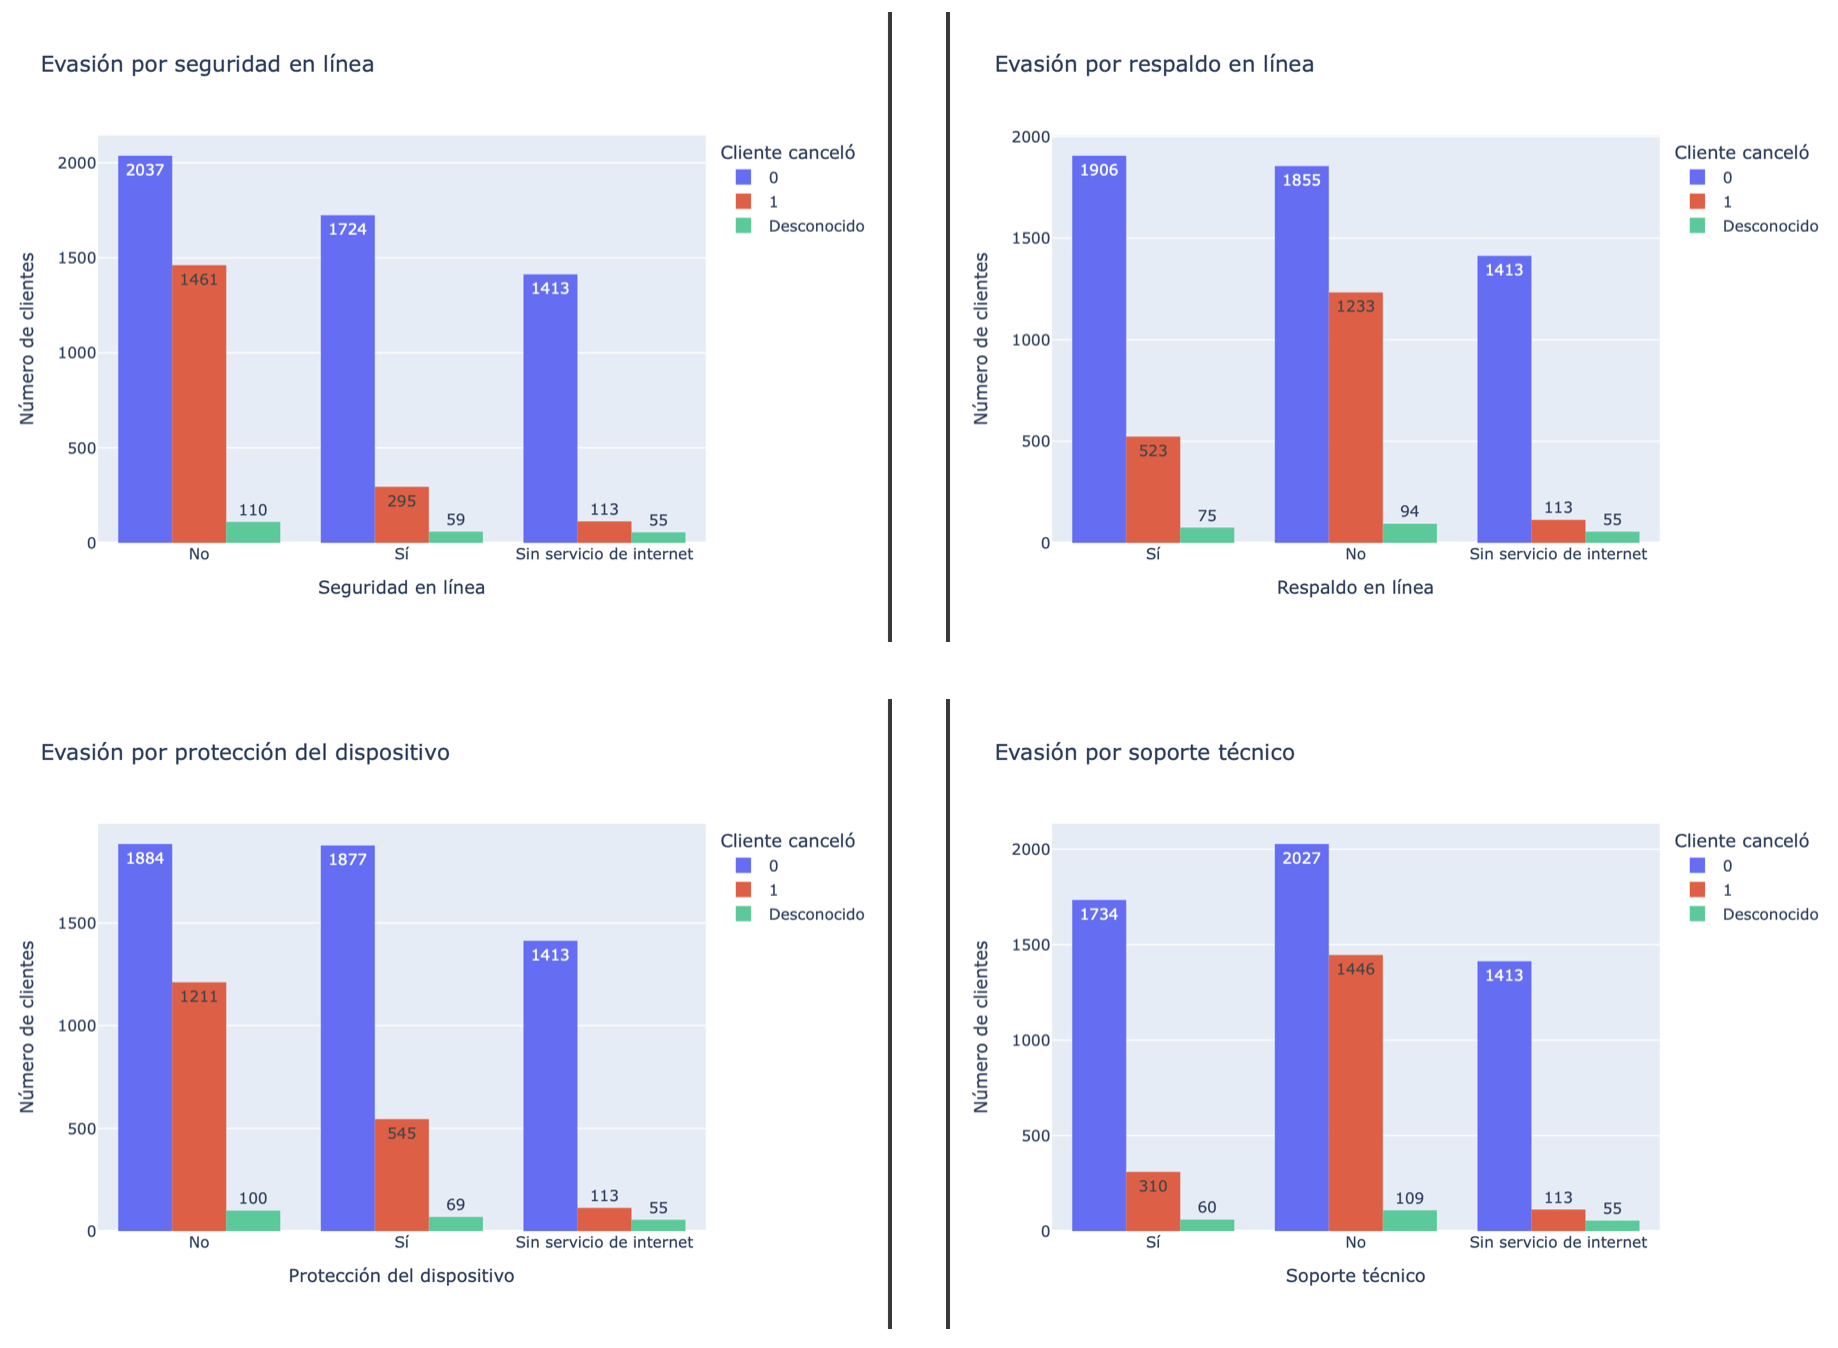

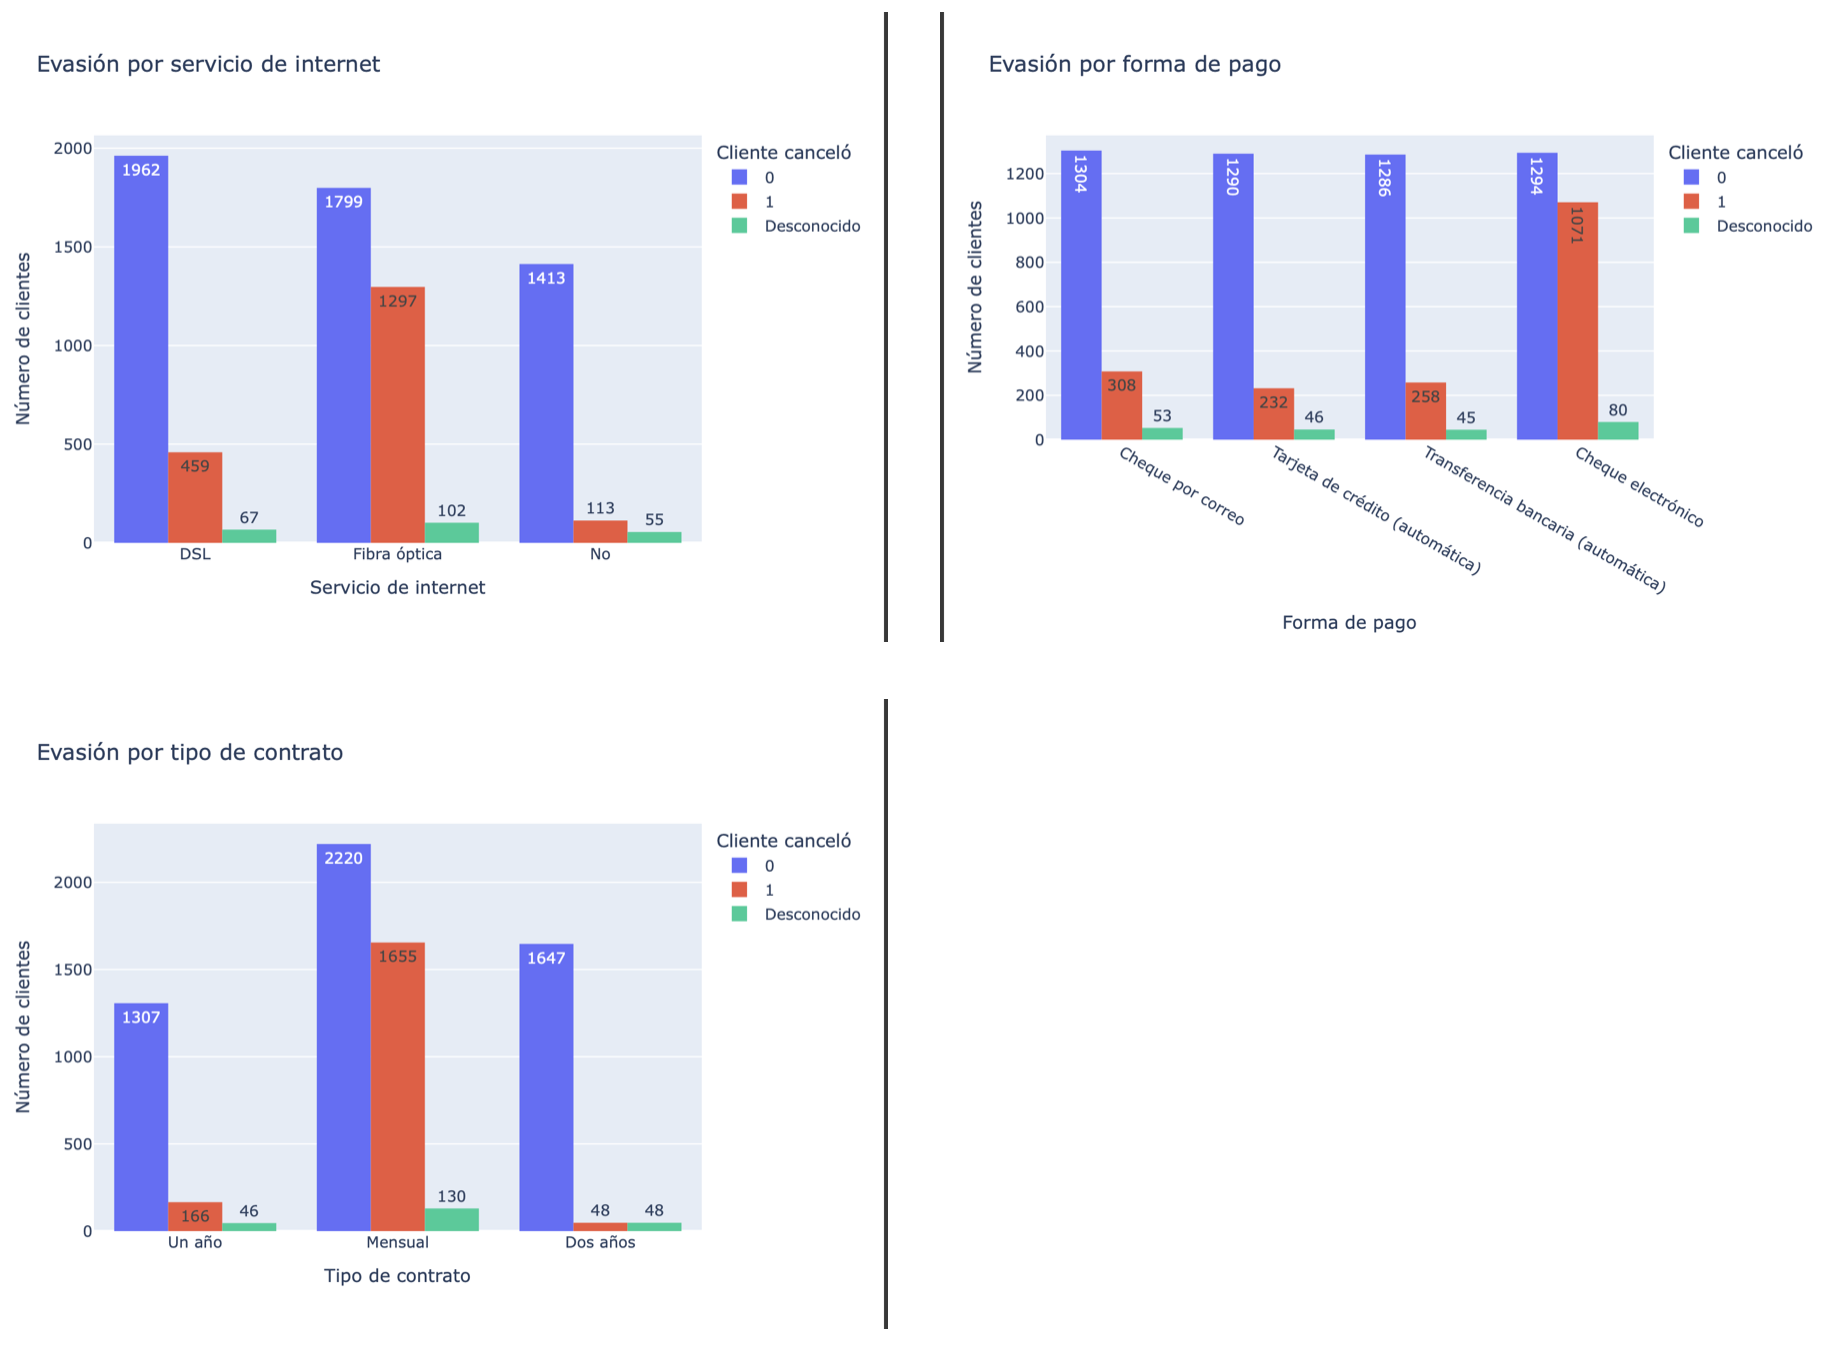

### 📈 Evasión y Variables Numéricas

- A través de histogramas y boxplots se observó:
  - Los clientes con **menor tiempo de contrato** tienen más probabilidad de cancelar.
  - Los clientes con **facturación mensual** entre 70 y 105 son los que más cancelan.
  - La **facturación anual** es más baja, en promedio, entre quienes cancelan.

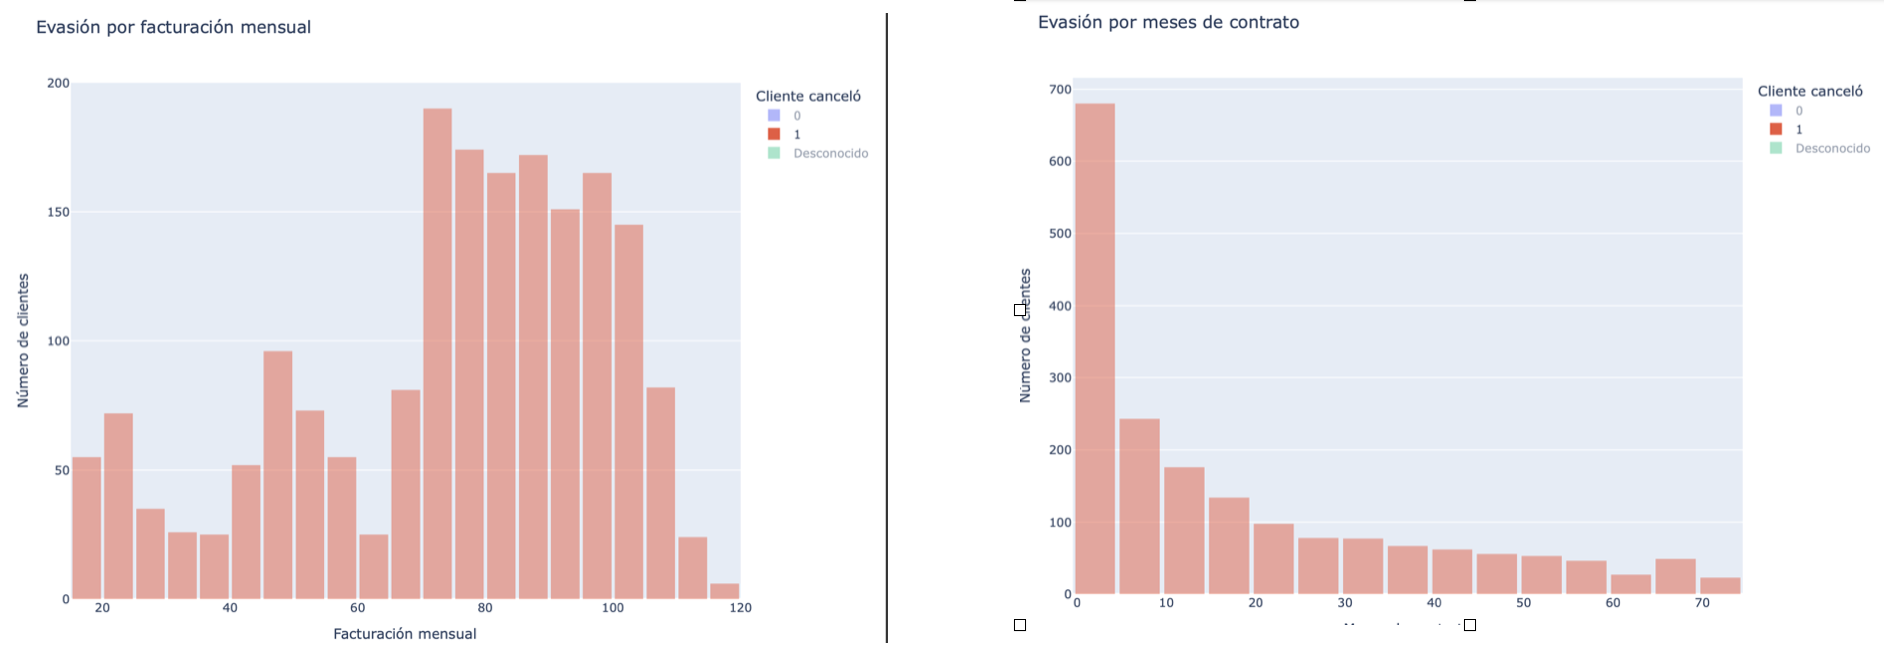

---

## 🔹 Conclusiones e Insights

- Los contratos de **corto plazo** y la falta de servicios adicionales (como seguridad en línea o soporte técnico) están correlacionados con mayores tasas de evasión.
- Los clientes que permanecen más tiempo en la empresa tienden a gastar más y a cancelar menos.
- La variable **“Método de pago”** es un indicador clave, especialmente cuando se usa el **cheque electrónico**.
- Los **clientes con pocos servicios contratados** también muestran mayor propensión a cancelar.
- Hay una cancelación notable en clientes con **fibra óptica**, un indicador de que posiblemente este servicio esté fallando bastante.
- Clientes con facturaciones mensuales que van desde los **70 a los 105** son los que tienen una mayor tasa de cancelación.

---

## 🔹 Recomendaciones

1. **Fomentar contratos de largo plazo**, ofreciendo descuentos u otros beneficios para clientes que se comprometan por 1 o 2 años.
2. **Incentivar la adopción de servicios complementarios**, como seguridad en línea, respaldo o soporte técnico. Servicios de prueba por un mes gratis pueden ser útiles para que el cliente experimente los beneficios.
3. **Mejorar la experiencia del cliente** especialmente para quienes usan **cheque electrónico** y **fibra óptica**, posiblemente explorando opciones más confiables o automatizadas.
4. **Monitorear clientes con 0 meses de contrato**, ya que hay un grupo relevante que cancela en el primer mes.

---

